In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## This week’s topic: Bank failures

Decades ago, the US decided to do something about this. They established the FDIC (Federal Deposit Insurance Corporation), which is a sort of bank insurance company. Every bank is required to pay FDIC. In exchange, the FDIC guarantees that anyone with up to $250k in their account will get their money, even if the bank goes insolvent. You, as a bank customers, thus don’t need to worry too much about which bank you’re at; so long as it’s FDIC insured, you’re guaranteed to get your money.

Turns out, they were the bank of choice for 50 percent (!) of all venture-backed startups in the US. They were the 16th largest bank in the US (according to the [Federal Reserve](https://www.federalreserve.gov/releases/lbr/current/default.htm)), with about $200b in assets. Ths isn’t a small community bank!

As of this writing, the FDIC has taken over SVB. Most interestingly, various parties (the FDIC, Federal Reserve, and US Treasury) have said that everyone will get their money back, not just those with up to $250k in deposits. That was likely a relief to the many startups that had deposited millions and billions of investments in the bank, and which were starting to worry about making payroll.

For more background on what happened with SVB, I’ll refer you to the (always amazing) Matt Levine, whose [“Money Stuff” column](https://www.bloomberg.com/opinion/authors/ARbTQlRLRjE/matthew-s-levine) can’t come often enough. I don’t know how he writes so much, and so insightfully, while being so funny — but he does.

Also, check out this story from This American Life in 2009, where reporter Chana Jaffe-Walt takes us through the FDIC’s takeover of a bank: https://www.thisamericanlife.org/377/scenes-from-a-recession/act-two-3. It was such a good story that I remembered it from more than a decade ago.

### Data

Our data this week comes from the FDIC, which offers a complete database describing bank failures at https://banks.data.fdic.gov/docs/. We’re specifically going to look at the bank-failure data, which is at the following page:

https://banks.data.fdic.gov/explore/failures?aggReport=detail&displayFields=NAME%2CCERT%2CFIN%2CCITYST%2CFAILDATE%2CSAVR%2CRESTYPE%2CCOST%2CRESTYPE1%2CCHCLASS1%2CQBFDEP%2CQBFASSET&endFailYear=2023&sortField=FAILDATE&sortOrder=desc&startFailYear=1934
Once at this URL, you can click on the “download” button. Or you can use the following URL:

https://pfabankapi.app.cloud.gov/api/failures?fields=NAME%2CCERT%2CFIN%2CCITYST%2CFAILDATE%2CSAVR%2CRESTYPE%2CCOST%2CRESTYPE1%2CCHCLASS1%2CQBFDEP%2CQBFASSET&filters=FAILYR%3A%5B1934%20TO%202023%5D&limit=10000&react=true&sort_by=FAILDATE&sort_order=desc&subtotal_by=RESTYPE&total_fields=QBFDEP%2CQBFASSET%2CCOST&format=csv&download=true&filename=bank-data

(And yes, I’ll admit that some of this data set is about “assistance,” rather than “failures,” but I’m just going to lump them all together under the term “failures” for the purposes of this week’s question and answers.)

The data dictionary for the file is at https://banks.data.fdic.gov/explore/failures/help.

### Tasks

Our questions for this week are:

1. According to our document, how many bank failures have there been since the FDIC was opened?
1. What was the earliest failure in our data set? What is the most recent failure in our data set?
1. In which five years did the greatest number of banks fail?
1. In which three states were the greatest number of failed banks?
1. What was the average market capitalization of the banks that failed? Given a capitalization of $200b, did that make SVB above, below, or about average?
1. When was the most recent failure greater than SVB?
1. Bank failures can be resolved in several different ways. How often, historically, have we seen each resolution? Were the odds good that SVB's uninsured depositors would get their money?
1. What about bank failures in the last 25 years -- if we just look at those, do the odds change?
1. What was the mean estimated loss in bank failures? What proportion of a bank's assets did this generally involve?

The learning goals for this week include working with dates and strings. And some insights into whether people were right to panic about losing their money when SVB went under.

In [3]:
url = "https://pfabankapi.app.cloud.gov/api/failures?fields=NAME%2CCERT%2CFIN%2CCITYST%2CFAILDATE%2CSAVR%2CRESTYPE%2CCOST%2CRESTYPE1%2CCHCLASS1%2CQBFDEP%2CQBFASSET&filters=FAILYR%3A%5B1934%20TO%202023%5D&limit=10000&react=true&sort_by=FAILDATE&sort_order=desc&subtotal_by=RESTYPE&total_fields=QBFDEP%2CQBFASSET%2CCOST&format=csv&download=true&filename=bank-data"
df = pd.read_csv(url)

In [4]:
df.head()

,CERT,CHCLASS1,CITYST,COST,FAILDATE,FIN,ID,NAME,QBFASSET,QBFDEP,RESTYPE,RESTYPE1,SAVR
0,8758.0,NM,"SAC CITY, IA",14804.0,11/3/2023,10545,4109,CITIZENS BANK,60448.0,52311.0,FAILURE,PA,DIF
1,25851.0,SM,"ELKHART, KS",54167.0,7/28/2023,10544,4108,HEARTLAND TRI-STATE BANK,139446.0,130110.0,FAILURE,PA,DIF
2,59017.0,NM,"SAN FRANCISCO, CA",16521935.0,5/1/2023,10543,4107,FIRST REPUBLIC BANK,212638872.0,176436706.0,FAILURE,PA,DIF
3,57053.0,NM,"NEW YORK, NY",884248.0,3/12/2023,10540,4106,SIGNATURE BANK,110363650.0,88612911.0,FAILURE,PA,DIF
4,24735.0,SM,"SANTA CLARA, CA",17820026.0,3/7/2023,10539,4105,SILICON VALLEY BANK,209026000.0,175378000.0,FAILURE,PA,DIF


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4109 entries, 0 to 4108
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CERT      3621 non-null   float64
 1   CHCLASS1  4109 non-null   object 
 2   CITYST    4109 non-null   object 
 3   COST      3472 non-null   float64
 4   FAILDATE  4109 non-null   object 
 5   FIN       4109 non-null   int64  
 6   ID        4109 non-null   int64  
 7   NAME      4109 non-null   object 
 8   QBFASSET  3955 non-null   float64
 9   QBFDEP    4107 non-null   float64
 10  RESTYPE   4109 non-null   object 
 11  RESTYPE1  4109 non-null   object 
 12  SAVR      4109 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 417.4+ KB


In [6]:
df["FAILDATE"] = pd.to_datetime(df["FAILDATE"])

In [7]:
df.head()

,CERT,CHCLASS1,CITYST,COST,FAILDATE,FIN,ID,NAME,QBFASSET,QBFDEP,RESTYPE,RESTYPE1,SAVR
0,8758.0,NM,"SAC CITY, IA",14804.0,2023-11-03,10545,4109,CITIZENS BANK,60448.0,52311.0,FAILURE,PA,DIF
1,25851.0,SM,"ELKHART, KS",54167.0,2023-07-28,10544,4108,HEARTLAND TRI-STATE BANK,139446.0,130110.0,FAILURE,PA,DIF
2,59017.0,NM,"SAN FRANCISCO, CA",16521935.0,2023-05-01,10543,4107,FIRST REPUBLIC BANK,212638872.0,176436706.0,FAILURE,PA,DIF
3,57053.0,NM,"NEW YORK, NY",884248.0,2023-03-12,10540,4106,SIGNATURE BANK,110363650.0,88612911.0,FAILURE,PA,DIF
4,24735.0,SM,"SANTA CLARA, CA",17820026.0,2023-03-07,10539,4105,SILICON VALLEY BANK,209026000.0,175378000.0,FAILURE,PA,DIF


#### 1. According to our document, how many bank failures have there been since the FDIC was opened?

In [8]:
df["RESTYPE"].value_counts()

RESTYPE
FAILURE       3516
ASSISTANCE     593
Name: count, dtype: int64

In [9]:
df.shape

(4109, 13)

In [10]:
len(df)

4109

In [11]:
df.count()

CERT        3621
CHCLASS1    4109
CITYST      4109
COST        3472
FAILDATE    4109
FIN         4109
ID          4109
NAME        4109
QBFASSET    3955
QBFDEP      4107
RESTYPE     4109
RESTYPE1    4109
SAVR        4109
dtype: int64

#### 2. What was the earliest failure in our data set? What is the most recent failure in our data set?

In [12]:
df["FAILDATE"].sort_values().head(1)

4108   1934-04-19
Name: FAILDATE, dtype: datetime64[ns]

In [13]:
df["FAILDATE"].min()

Timestamp('1934-04-19 00:00:00')

In [14]:
df["FAILDATE"].sort_values().tail(1)

0   2023-11-03
Name: FAILDATE, dtype: datetime64[ns]

In [15]:
df["FAILDATE"].max()

Timestamp('2023-11-03 00:00:00')

In [16]:
df["FAILDATE"].agg(["min", "max"])

min   1934-04-19
max   2023-11-03
Name: FAILDATE, dtype: datetime64[ns]

In [17]:
df["FAILDATE"].describe()

count                             4109
mean     1985-12-28 03:27:06.965198336
min                1934-04-19 00:00:00
25%                1985-07-11 00:00:00
50%                1988-12-30 00:00:00
75%                1991-05-03 00:00:00
max                2023-11-03 00:00:00
Name: FAILDATE, dtype: object

#### 3. In which five years did the greatest number of banks fail?

In [18]:
df["FAILDATE"].dt.year.value_counts().head(5)

FAILDATE
1989    534
1988    470
1990    382
1991    271
1987    262
Name: count, dtype: int64

In [19]:
df.groupby(df["FAILDATE"].dt.year)["NAME"].count().sort_values(ascending=False).head(5)

FAILDATE
1989    534
1988    470
1990    382
1991    271
1987    262
Name: NAME, dtype: int64

#### 4. In which three states were the greatest number of failed banks?

In [20]:
df["CITYST"].value_counts().head(5)

CITYST
HOUSTON, TX        105
DALLAS, TX          64
CHICAGO, IL         51
SAN ANTONIO, TX     45
AUSTIN, TX          43
Name: count, dtype: int64

Because CITYST contains a city name and the state, we have to extract the state first to answer the question

In [21]:
df["ST"] = df["CITYST"].str.split(", ", expand=True)[1]

In [22]:
df["ST"] = df["CITYST"].str.slice(-2, None)

In [23]:
df.head()

,CERT,CHCLASS1,CITYST,COST,FAILDATE,FIN,ID,NAME,QBFASSET,QBFDEP,RESTYPE,RESTYPE1,SAVR,ST
0,8758.0,NM,"SAC CITY, IA",14804.0,2023-11-03,10545,4109,CITIZENS BANK,60448.0,52311.0,FAILURE,PA,DIF,IA
1,25851.0,SM,"ELKHART, KS",54167.0,2023-07-28,10544,4108,HEARTLAND TRI-STATE BANK,139446.0,130110.0,FAILURE,PA,DIF,KS
2,59017.0,NM,"SAN FRANCISCO, CA",16521935.0,2023-05-01,10543,4107,FIRST REPUBLIC BANK,212638872.0,176436706.0,FAILURE,PA,DIF,CA
3,57053.0,NM,"NEW YORK, NY",884248.0,2023-03-12,10540,4106,SIGNATURE BANK,110363650.0,88612911.0,FAILURE,PA,DIF,NY
4,24735.0,SM,"SANTA CLARA, CA",17820026.0,2023-03-07,10539,4105,SILICON VALLEY BANK,209026000.0,175378000.0,FAILURE,PA,DIF,CA


In [24]:
df["ST"].value_counts().head(5) 

ST
TX    910
CA    265
IL    227
FL    199
OK    182
Name: count, dtype: int64

#### 5. What was the average market capitalization of the banks that failed? Given a capitalization of $200b, did that make SVB above, below, or about average?

Numbers represent thousands of US Dollars

<Axes: ylabel='Frequency'>

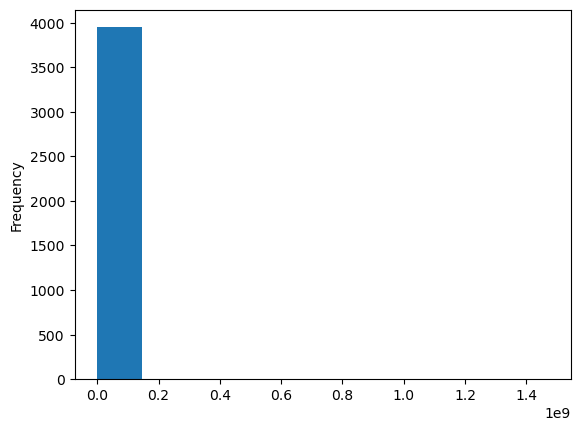

In [25]:
df["QBFASSET"].plot.hist()

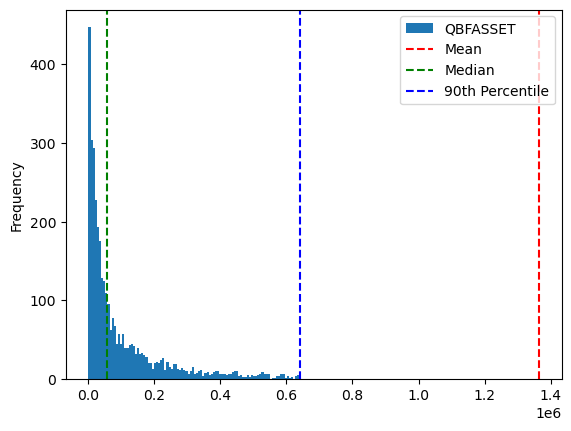

In [39]:
df[df["QBFASSET"] < df["QBFASSET"].quantile(.90)]["QBFASSET"].plot.hist(bins=100)
plt.axvline(df["QBFASSET"].mean(), color="red", linestyle="--", label="Mean")
plt.axvline(df["QBFASSET"].median(), color="green", linestyle="--", label="Median")
plt.axvline(df["QBFASSET"].quantile(.90), color="blue", linestyle="--", label="90th Percentile")
plt.legend()

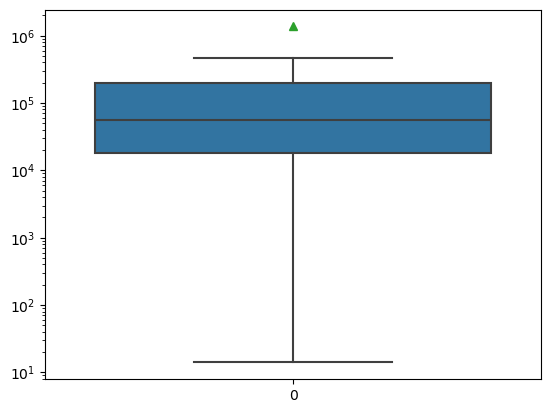

In [49]:
sns.boxplot(df["QBFASSET"], showmeans=True, showfliers=False)
plt.yscale("log")

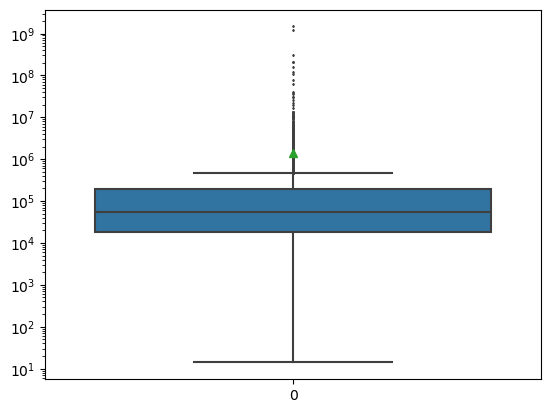

In [57]:
sns.boxplot(df["QBFASSET"], showmeans=True, showfliers=True, fliersize=1)
plt.yscale("log")

In [58]:
df["QBFASSET"].mean()

1366147.8725663717

In [62]:
df[df["NAME"] == "SILICON VALLEY BANK"] # SVB

,CERT,CHCLASS1,CITYST,COST,FAILDATE,FIN,ID,NAME,QBFASSET,QBFDEP,RESTYPE,RESTYPE1,SAVR,ST
4,24735.0,SM,"SANTA CLARA, CA",17820026.0,2023-03-07,10539,4105,SILICON VALLEY BANK,209026000.0,175378000.0,FAILURE,PA,DIF,CA


In [60]:
df[df["QBFASSET"] > 200_000_000]

,CERT,CHCLASS1,CITYST,COST,FAILDATE,FIN,ID,NAME,QBFASSET,QBFDEP,RESTYPE,RESTYPE1,SAVR,ST
2,59017.0,NM,"SAN FRANCISCO, CA",16521935.0,2023-05-01,10543,4107,FIRST REPUBLIC BANK,2.126389e+08,176436706.0,FAILURE,PA,DIF,CA
4,24735.0,SM,"SANTA CLARA, CA",17820026.0,2023-03-07,10539,4105,SILICON VALLEY BANK,2.090260e+08,175378000.0,FAILURE,PA,DIF,CA
514,3510.0,N,"CHARLOTTE, NC",NaN,2009-01-16,0,3586,BANK OF AMERICA N.A.,1.471631e+09,954677580.0,ASSISTANCE,OBAM,DIF,NC
527,7213.0,N,"LAS VEGAS, NV",NaN,2008-11-23,0,3578,"CITIBANK, NATIONAL ASSOCIATION",1.207007e+09,230042000.0,ASSISTANCE,OBAM,DIF,NV
541,32633.0,SB,"HENDERSON, NV",0.0,2008-09-25,10015,3568,WASHINGTON MUTUAL BANK,3.070216e+08,188260793.0,FAILURE,PA,DIF,NV


In [65]:
(df["QBFASSET"] > 200_000_000).value_counts()

QBFASSET
False    4104
True        5
Name: count, dtype: int64

In [66]:
(df["QBFASSET"] > 200_000_000).value_counts(normalize=True)

QBFASSET
False    0.998783
True     0.001217
Name: proportion, dtype: float64

#### 6. When was the most recent failure greater than SVB?

In [68]:
svb_assets = df[df["NAME"] == "SILICON VALLEY BANK"]["QBFASSET"].values[0]
df[df["QBFASSET"] > svb_assets].sort_values("FAILDATE", ascending=False)

,CERT,CHCLASS1,CITYST,COST,FAILDATE,FIN,ID,NAME,QBFASSET,QBFDEP,RESTYPE,RESTYPE1,SAVR,ST
2,59017.0,NM,"SAN FRANCISCO, CA",16521935.0,2023-05-01,10543,4107,FIRST REPUBLIC BANK,2.126389e+08,176436706.0,FAILURE,PA,DIF,CA
514,3510.0,N,"CHARLOTTE, NC",NaN,2009-01-16,0,3586,BANK OF AMERICA N.A.,1.471631e+09,954677580.0,ASSISTANCE,OBAM,DIF,NC
527,7213.0,N,"LAS VEGAS, NV",NaN,2008-11-23,0,3578,"CITIBANK, NATIONAL ASSOCIATION",1.207007e+09,230042000.0,ASSISTANCE,OBAM,DIF,NV
541,32633.0,SB,"HENDERSON, NV",0.0,2008-09-25,10015,3568,WASHINGTON MUTUAL BANK,3.070216e+08,188260793.0,FAILURE,PA,DIF,NV


#### 7. Bank failures can be resolved in several different ways. How often, historically, have we seen each resolution? Were the odds good that SVB's uninsured depositors would get their money?


Category 1 - Institution's charter survives

 A/A (Assistance Transactions). These include:

transactions

where assistance was provided to the acquirer, who purchased the entire institution. For a few FSLIC transactions, the acquirer purchased the entire bridge bank - type entity, but certain other assets were moved into a liquidating receivership prior to the sale, and

open bank

assistance transactions, including those where assistance was provided under a systemic risk determination (in such cases any costs that exceed the amounts estimated under the least cost resolution requirement would be recovered through a special assessment on all FDIC-insured institutions).

REP - Re-privatization, management takeover with or without assistance at takeover, followed by a sale with or without additional assistance.

Category 2 - Institution's charter is terminated, insured deposits plus some assets and other liabilities are transferred to a successor charter

P&A - Purchase and Assumption, where some or all of the deposits, certain other liabilities and a portion of the assets (sometimes all of the assets) were sold to an acquirer. It was not determined if all of the deposits (PA) or only the insured deposits (PI) were assumed.

 PA - Purchase and Assumption, where the insured and uninsured deposits, certain other liabilities and a portion of the assets were sold to an acquirer.

 PI - Purchase and Assumption of the insured deposits only, where the traditional P&A was modified so that only the insured deposits were assumed by the acquiring institution.

IDT - Insured Deposit Transfer, where the acquiring institution served as a paying agent for the insurer, established accounts on their books for depositors, and often acquired some assets as well. Includes ABT (asset-backed transfer, a FSLIC transaction that is very similar to an IDT).

MGR - An institution where FSLIC took over management and generally provided financial assistance. FSLIC closed down before the institution was sold.

Category 3

PO - Payout, where the insurer paid the depositors directly and placed the assets in a liquidating receivership.

Note: Includes transactions where the FDIC established a Deposit Insurance National Bank to facilitate the payout process.

In [83]:
df.RESTYPE1.value_counts(normalize=True).round(4) * 100

RESTYPE1
PA      51.16
A/A     14.09
PO      13.94
IDT      9.39
P&A      6.11
PI       3.41
MGR      0.90
ABT      0.39
OBAM     0.32
DINB     0.22
REP      0.07
Name: proportion, dtype: float64

<Axes: xlabel='RESTYPE1'>

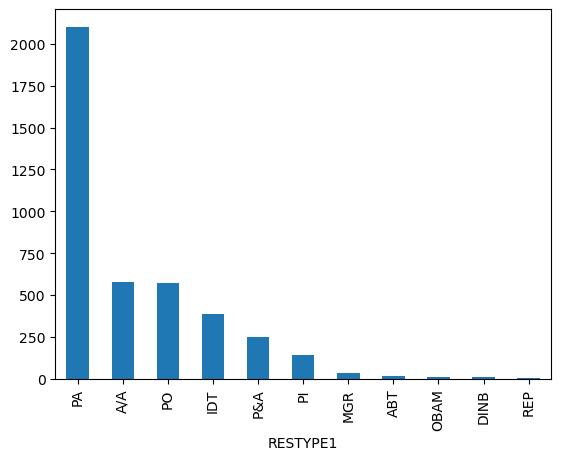

In [80]:
df.RESTYPE1.value_counts().plot.bar()

#### 8. What about bank failures in the last 25 years — if we just look at those, do the odds change?

In [85]:
df[df["FAILDATE"].dt.year > 2000].RESTYPE1.value_counts(normalize=True).round(4) * 100

RESTYPE1
PA      87.74
PI       4.66
PO       3.97
OBAM     2.25
DINB     1.38
Name: proportion, dtype: float64

#### 9. What was the mean estimated loss in bank failures? What proportion of a bank's assets did this generally involve?

[]

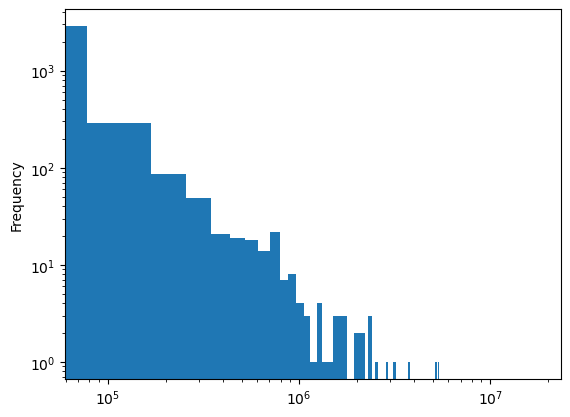

In [97]:
df["COST"].dropna().plot.hist(bins=200)
plt.loglog()

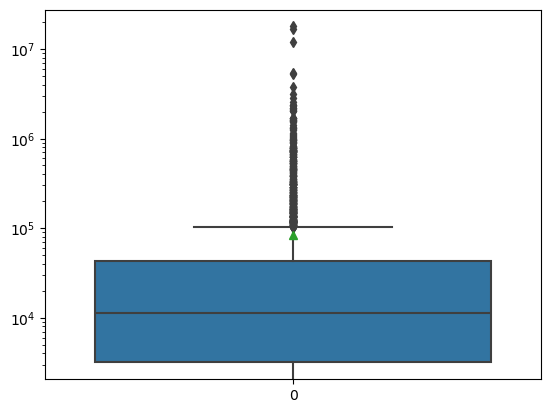

In [101]:
sns.boxplot(df["COST"], showmeans=True, showfliers=True)
plt.yscale("log")

In [102]:
df["COST"].mean()

84698.09879032258

We see that it cost, on average, $85m to bail out a bank.

In [103]:
df["COST"].median()

11315.0

In [104]:
df["COST_PER"] = df["COST"] / df["QBFASSET"]

In [105]:
df.groupby("RESTYPE1")["COST_PER"].mean()

RESTYPE1
A/A     0.270482
ABT     0.574982
DINB    0.310333
IDT     0.407632
MGR     0.753728
OBAM         NaN
P&A          NaN
PA      0.211179
PI      0.190293
PO      0.362070
REP     0.037530
Name: COST_PER, dtype: float64